In [25]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [26]:
env = gym.make("Taxi-v3").env

In [27]:
Q_Table = np.zeros((env.observation_space.n,env.action_space.n))
episode_number = 10000

In [28]:
alpha = 0.1
gamma = 0.9
epsilon = 0.2

In [29]:
reward_list = []
for episode in range(episode_number):
    reward_count = 0
    dropouts = 0
    
    state = env.reset()
    while True:
        
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_Table[state])
            
        next_state, reward, done, _ = env.step(action)
        next_state_max_Q = np.max(Q_Table[next_state])
        
        old_value = Q_Table[state,action]
        new_value = (1-alpha)*old_value + alpha*(reward + gamma*next_state_max_Q)
        
        Q_Table[state,action] = new_value
        state = next_state
        
        if reward == -10:
            dropouts += 1
        reward_count += reward
        if done:
            break
    if episode%10 == 0:
        reward_list.append(reward_count)

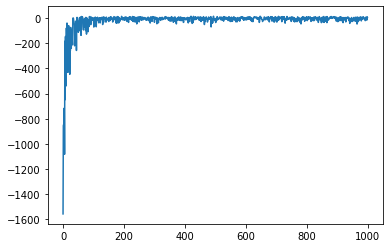

In [30]:
plt.plot(reward_list)
plt.show()

In [ ]:
for episode in range(1, 11):
    state = env.reset()
    
    episode_length = 0
    while True:
        action = np.argmax(Q_Table[state])
        next_state, reward, done, info = env.step(action)
        clear_output(wait=True)
        print("Episode number {} Step {}".format(episode, episode_length))
        print(env.render(mode="ansi"))
        time.sleep(.5)
        state = next_state
        episode_length +=1
        if done:
            break
        

Episode number 3 Step 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

